# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
#data manapulation libraries
import pandas as pd
import numpy as np
#data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
#warnings and os
import os
import warnings
warnings.filterwarnings('ignore')
#statsmodels and sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
#train-test split
from sklearn.model_selection import train_test_split
#metrics like r2 and means square error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#rescaling
from sklearn.preprocessing import MinMaxScaler
#Linear model
from sklearn.linear_model import LinearRegression
# Rfe feature selection
from sklearn.feature_selection import RFE
from scipy import stats

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
porter=pd.read_csv('porter_data_1.csv')

In [3]:
porter.shape

(175777, 14)

In [4]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [5]:
porter.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [6]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at']=pd.to_datetime(porter['created_at'])
porter['actual_delivery_time']=pd.to_datetime(porter['actual_delivery_time'])

In [7]:
porter.head(2)

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60

In [8]:
porter.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [9]:
porter['market_id'].unique()

array([1., 2., 3., 4., 5., 6.])

In [10]:
porter['store_primary_category'].unique()

array([ 4, 46, 36, 38, 58, 68, 15, 57, 55, 20, 60, 13, 45, 39, 34, 18, 29,
       23, 50, 70,  6,  7, 10, 28, 24, 61, 59, 72, 16, 65, 47, 53, 49, 40,
       66, 42, 21, 14, 35, 11, 52,  2, 71, 25, 54, 69, 26, 12, 32, 30, 17,
       33, 22, 31,  0, 51, 48, 67, 44, 62,  9, 27, 19,  1,  5, 41, 37, 64,
       56, 63, 43,  8,  3], dtype=int64)

In [11]:
porter['order_protocol'].unique()

array([1., 2., 3., 5., 4., 6., 7.])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [12]:
# Convert categorical features to category type
porter['market_id']=porter['market_id'].astype(str)
porter['store_primary_category']=porter['store_primary_category'].astype(str)
porter['order_protocol']=porter['order_protocol'].astype(str)

In [13]:
porter.dtypes

market_id                           object
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category              object
order_protocol                      object
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

In [14]:

porter['order_day_month']=porter['created_at'].dt.day
porter['delivery_duration']=porter['actual_delivery_time']-porter['created_at']

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [15]:
# Calculate time taken in minutes
porter['delivery_duration_mins']=(porter['actual_delivery_time']-porter['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [16]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['Order_day_ofweek']=porter['created_at'].dt.dayofweek
porter['order_hour']=porter['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
porter['weekend']=porter['Order_day_ofweek'].apply(lambda x:'Yes' if x in [5,6] else 'No')

In [17]:
porter['Weekend']=porter['weekend'].replace({'Yes':1,'No':0})

In [18]:
# Drop unnecessary columns
porter.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_day_month',
       'delivery_duration', 'delivery_duration_mins', 'Order_day_ofweek',
       'order_hour', 'weekend', 'Weekend'],
      dtype='object')

In [19]:
cols_to_drop=['created_at','actual_delivery_time','delivery_duration','order_day_month','weekend']
porter.drop(cols_to_drop,axis=1,inplace=True)

In [20]:
porter.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_mins',
       'Order_day_ofweek', 'order_hour', 'Weekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [21]:
# Define target variable (y) and features (X)
target_variable='delivery_duration_mins'
features=['market_id','store_primary_category','order_protocol','total_items',
    'subtotal','num_distinct_items','min_item_price','max_item_price',
    'total_onshift_dashers','total_busy_dashers','total_outstanding_orders',
    'distance','Order_day_ofweek','order_hour','Weekend']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [22]:
# Split data into training and testing sets
df_train,df_test=train_test_split(porter,train_size=0.7,test_size=0.3,random_state=100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat=['market_id ','store_primary_category','order_protocol']
num=[i for i in porter.columns if porter[i].dtype!='object']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

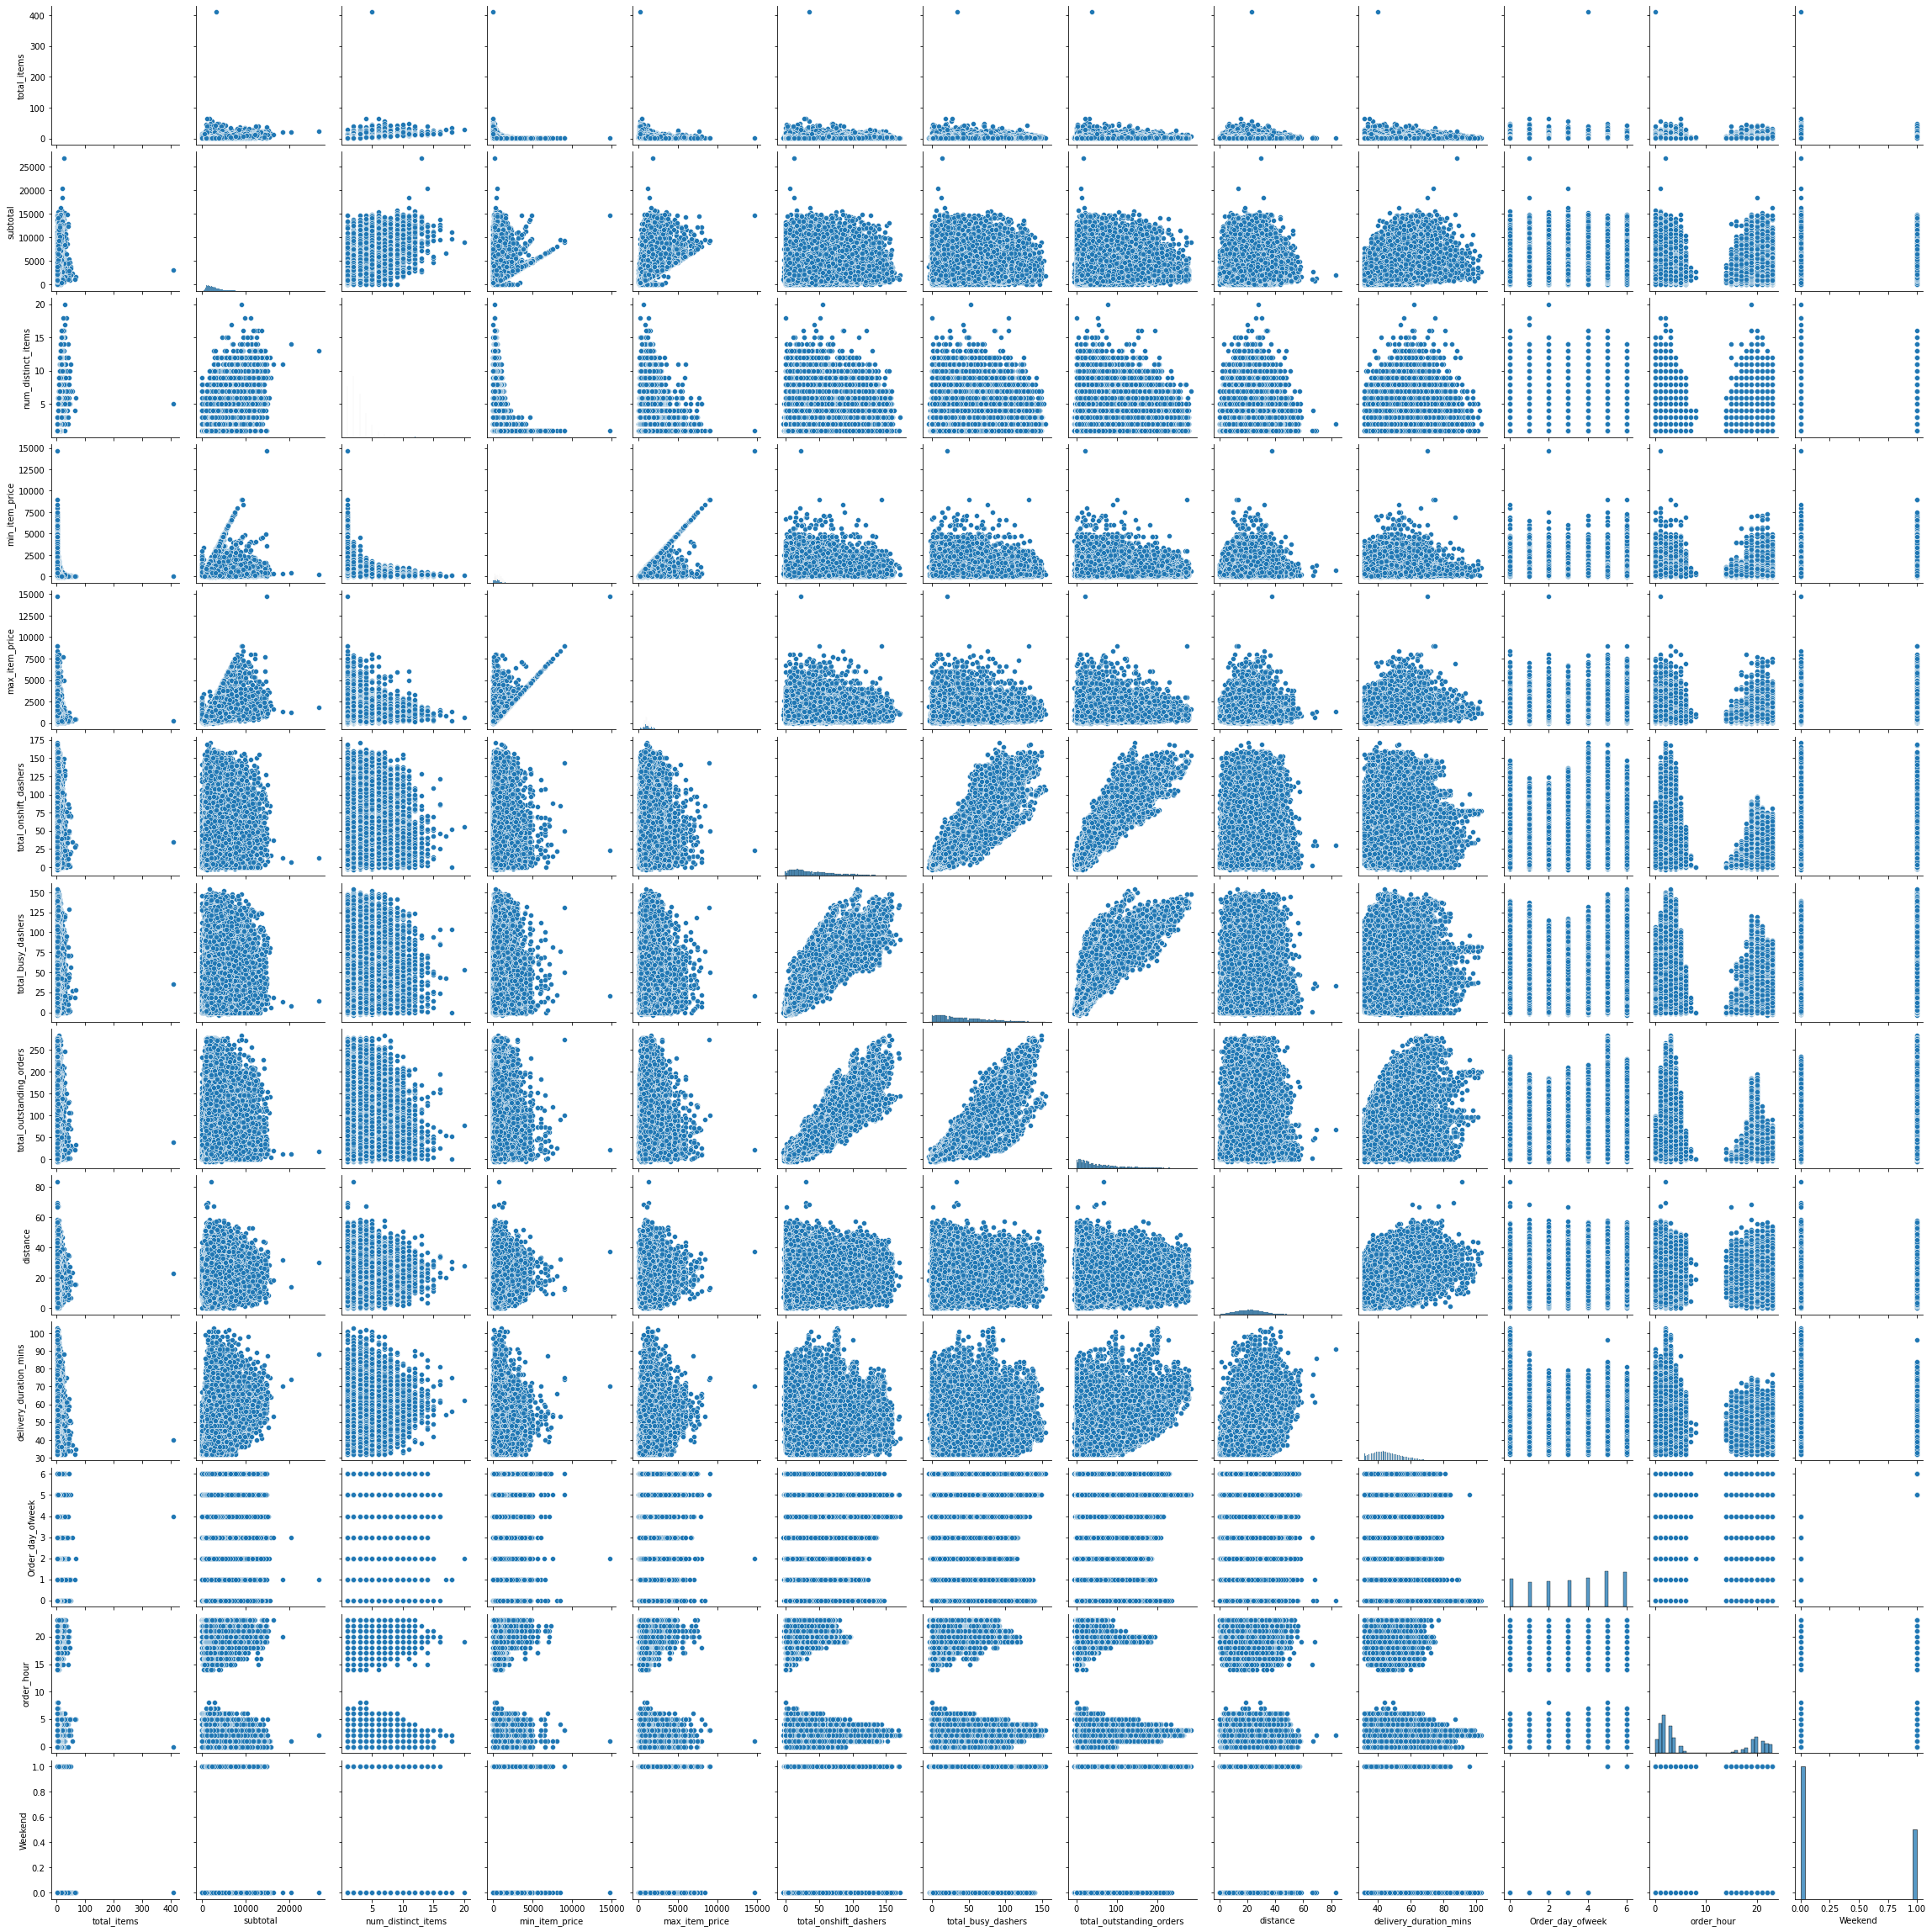

In [24]:
# Plot distributions for all numerical columns
sns.pairplot(data=df_train[num])
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

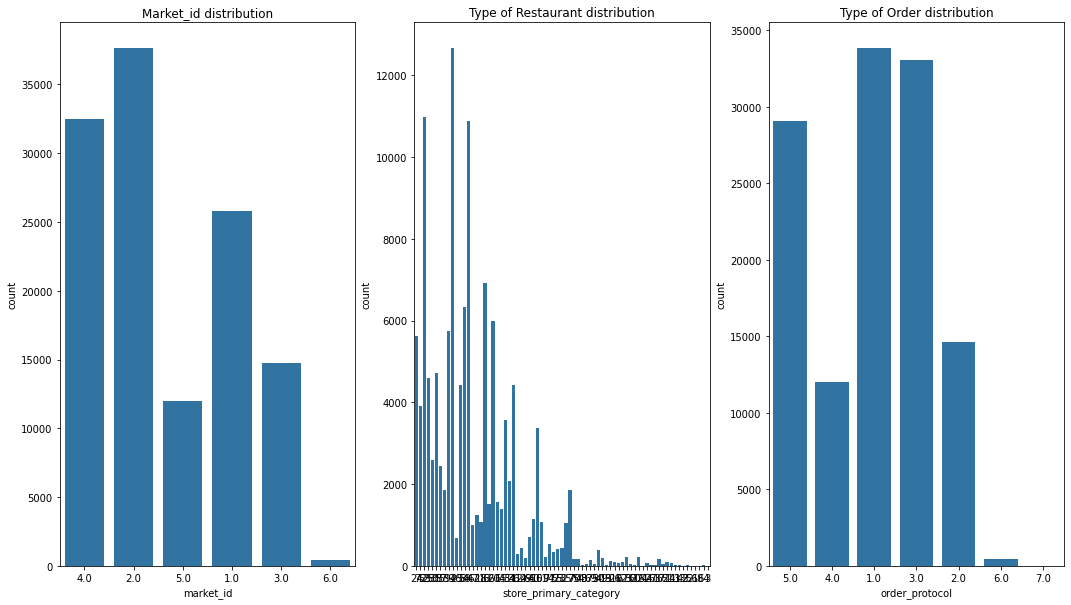

In [25]:
# Distribution of categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 10))  # 1 rows, 3 columns

sns.countplot(data=df_train,x='market_id',ax=axes[0])
axes[0].set_title('Market_id distribution')

sns.countplot(data=df_train,x='store_primary_category',ax=axes[1])
axes[1].set_title('Type of Restaurant distribution')

sns.countplot(data=df_train,x='order_protocol',ax=axes[2])
axes[2].set_title('Type of Order distribution')

plt.tight_layout
plt.show()

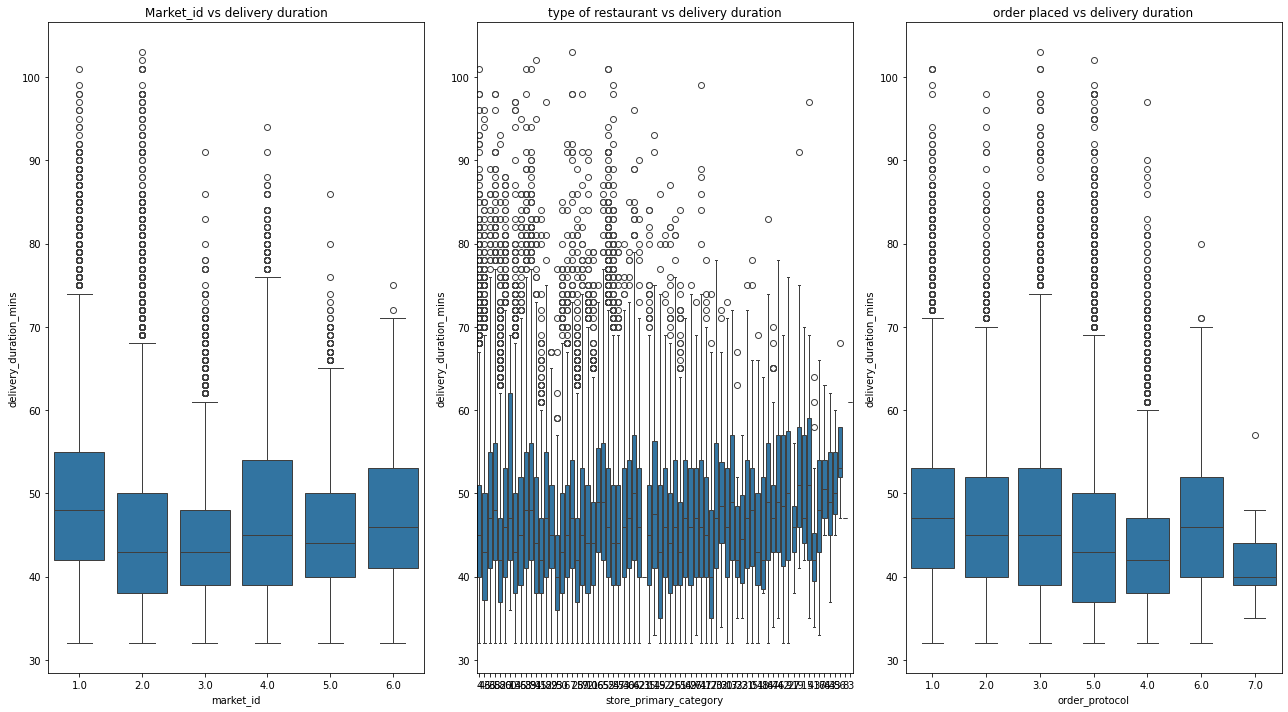

In [26]:
#catergorical columns vs delivery duration
fig, axes = plt.subplots(1, 3, figsize=(18, 10))  # 1 rows, 3 columns



sns.boxplot(ax=axes[0],x=df_train['market_id'],y=porter['delivery_duration_mins'])
axes[0].set_title('Market_id vs delivery duration')

sns.boxplot(ax=axes[1],x=df_train['store_primary_category'],y=porter['delivery_duration_mins'])
axes[1].set_title('type of restaurant vs delivery duration')

sns.boxplot(ax=axes[2],x=df_train['order_protocol'],y=porter['delivery_duration_mins'])
axes[2].set_title('order placed vs delivery duration')


plt.tight_layout()
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

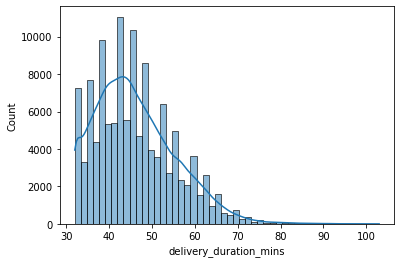

In [27]:
# Distribution of time_taken
sns.histplot(data=df_train,x='delivery_duration_mins',bins=50,kde=True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

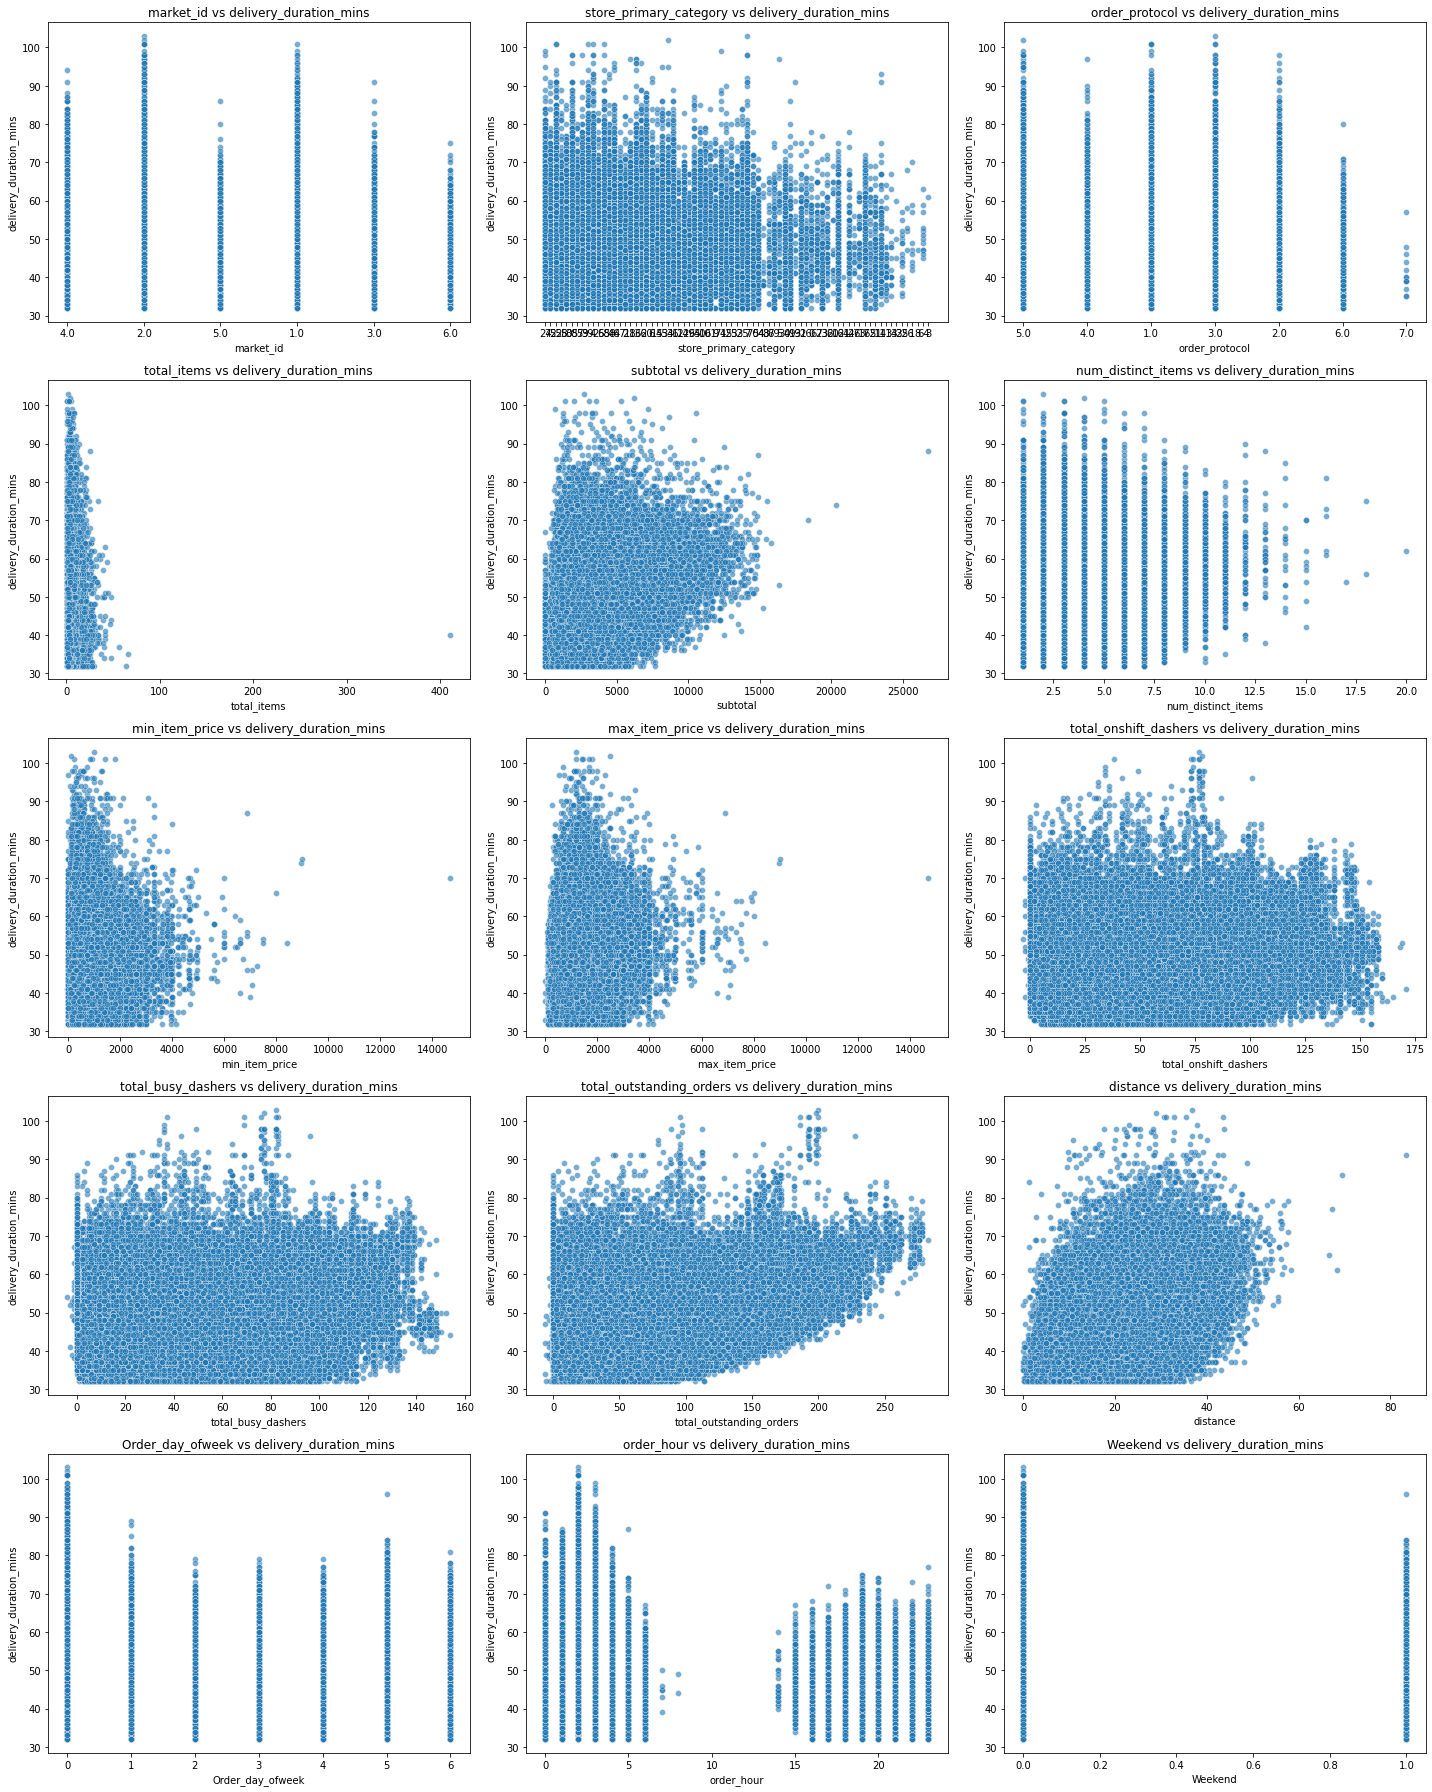

In [28]:
# Scatter plot to visualise the relationship between time_taken and other features

# Plot scatter plots
plt.figure(figsize=(20, 25))
for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(data=df_train, x=col, y=target_variable, alpha=0.6)
    plt.title(f'{col} vs {target_variable}')
    plt.tight_layout()

plt.show()

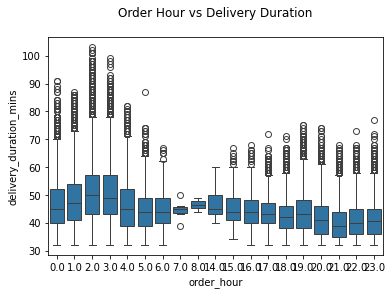

In [29]:
# Show the distribution of time_taken for different hours
sns.boxplot(x=df_train['order_hour'],y=porter['delivery_duration_mins'])
plt.title('Order Hour vs Delivery Duration\n')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

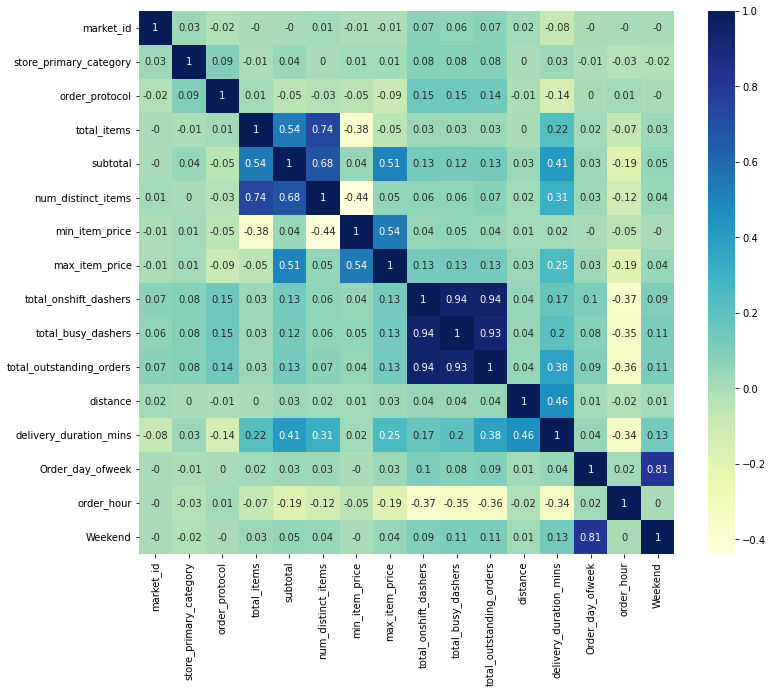

In [30]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(round(df_train.corr(),2),annot=True,cmap='YlGnBu')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [31]:
cor=round(df_train.corr(),2)
cor=cor.loc['delivery_duration_mins',:]

In [32]:
cor.sort_values(ascending=False)

delivery_duration_mins      1.00
distance                    0.46
subtotal                    0.41
total_outstanding_orders    0.38
num_distinct_items          0.31
max_item_price              0.25
total_items                 0.22
total_busy_dashers          0.20
total_onshift_dashers       0.17
Weekend                     0.13
Order_day_ofweek            0.04
store_primary_category      0.03
min_item_price              0.02
market_id                  -0.08
order_protocol             -0.14
order_hour                 -0.34
Name: delivery_duration_mins, dtype: float64

In [33]:
# Drop 3-5 weakly correlated columns from training dataset
df_train.drop(['min_item_price','store_primary_category','market_id','order_protocol','Order_day_ofweek'],axis=1,inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

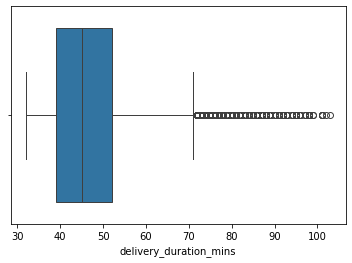

In [34]:
# Boxplot for time_taken
sns.boxplot(x=df_train['delivery_duration_mins'])
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [35]:
# Handle outliers
num_cols = ['total_items', 'subtotal', 'num_distinct_items', 
            'max_item_price', 'total_onshift_dashers', 
            'total_busy_dashers', 'total_outstanding_orders', 
            'distance', 'order_hour', 'delivery_duration_mins']

# IQR filtering function
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to all numerical columns
for col in num_cols:
    df_train = remove_outliers_iqr(df_train, col)



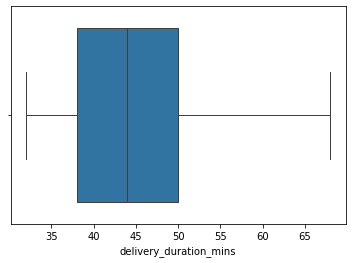

In [36]:
# Boxplot for time_taken now with outlier handled
sns.boxplot(x=df_train['delivery_duration_mins'])
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [37]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_test=['market_id ','store_primary_category','order_protocol']
num_test=[i for i in df_test.columns if df_test[i].dtype!='object']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

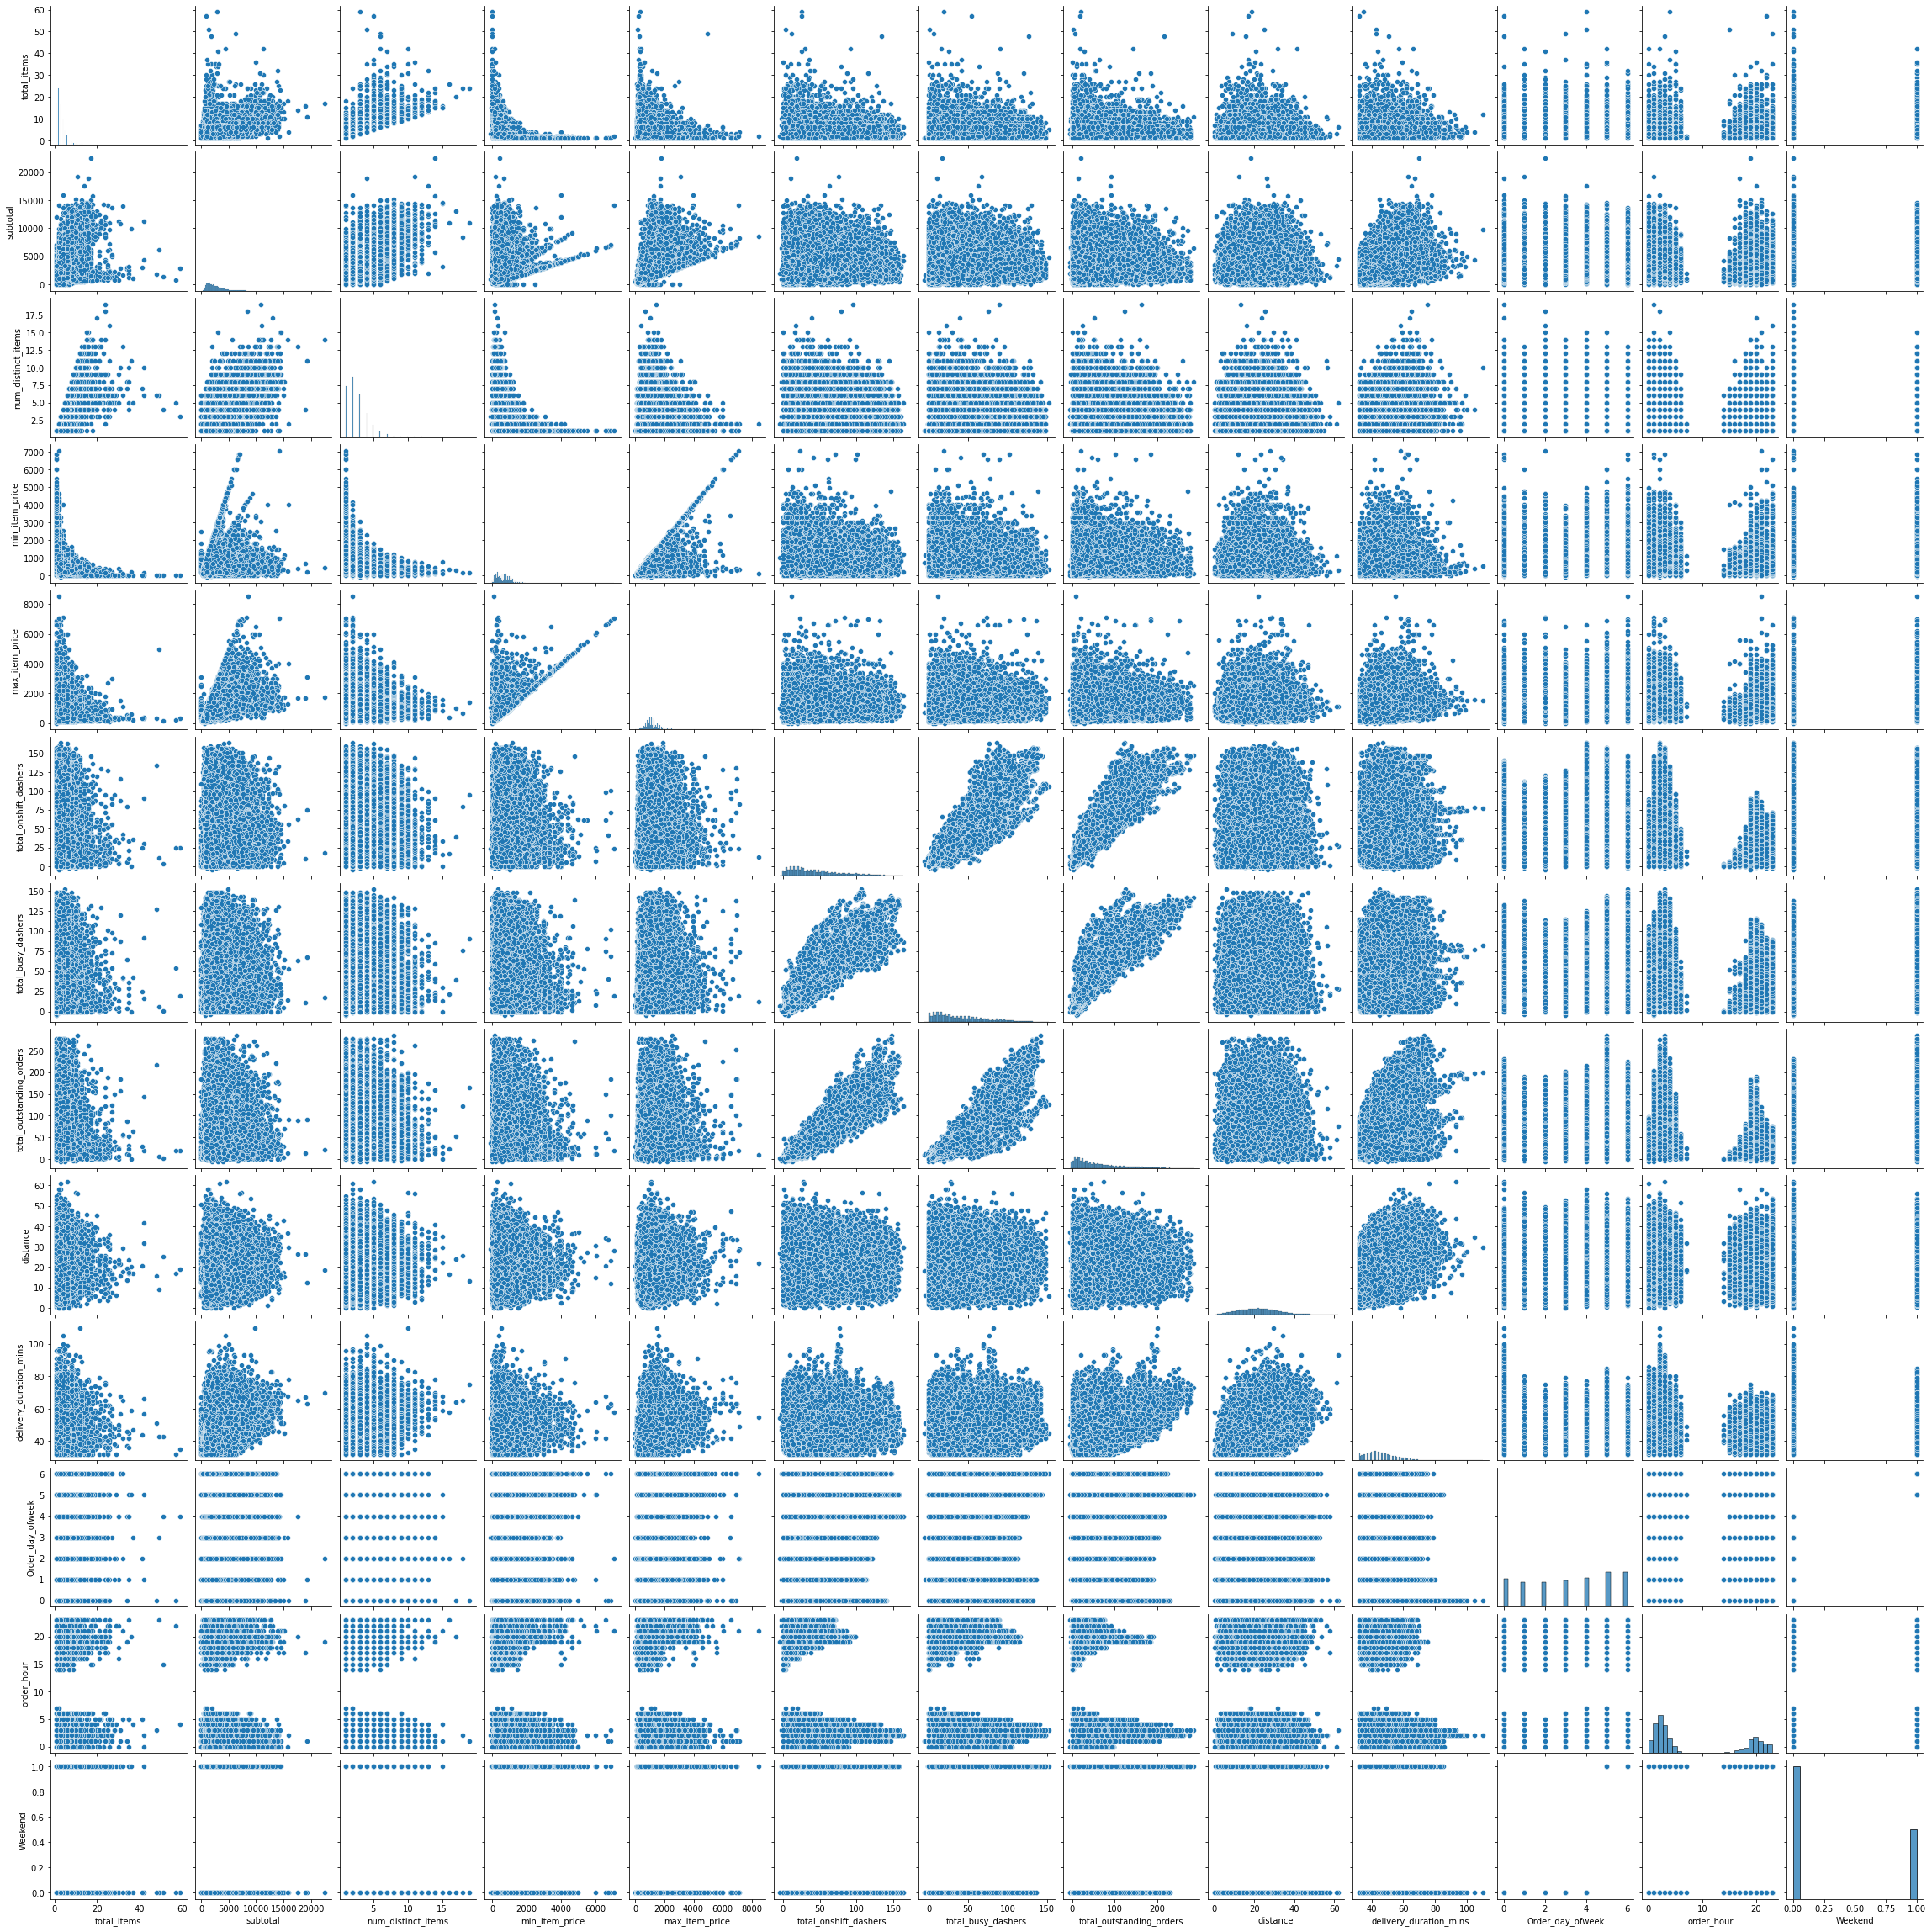

In [38]:
# Plot distributions for all numerical columns
sns.pairplot(data=df_test[num])
plt.show()

##### **4.1.2**
Check the distribution of categorical features

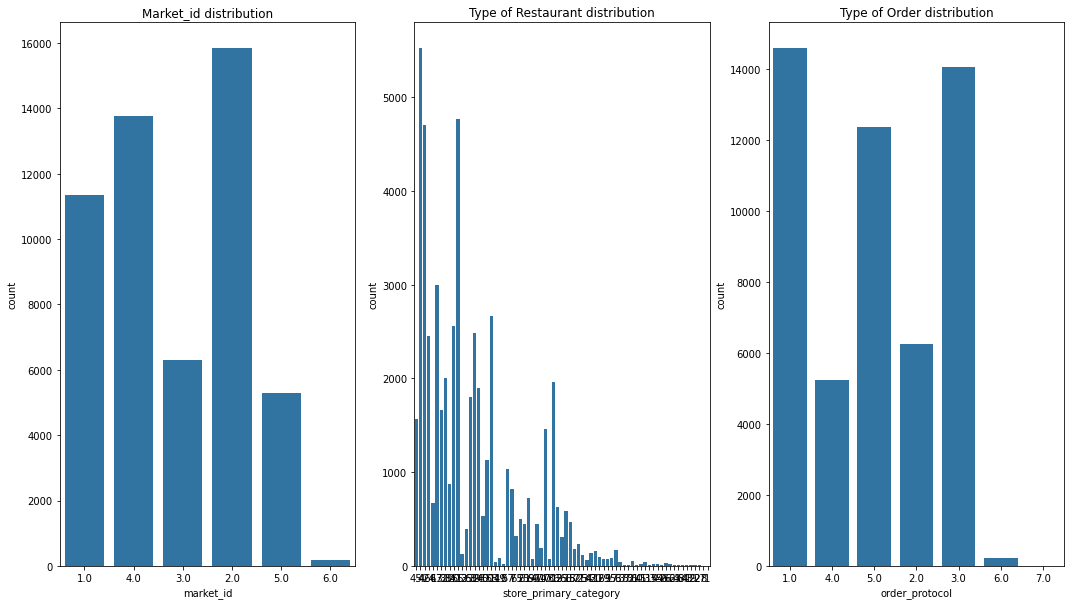

In [39]:
# Distribution of categorical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 10))  # 1 rows, 3 columns

sns.countplot(data=df_test,x='market_id',ax=axes[0])
axes[0].set_title('Market_id distribution')

sns.countplot(data=df_test,x='store_primary_category',ax=axes[1])
axes[1].set_title('Type of Restaurant distribution')

sns.countplot(data=df_test,x='order_protocol',ax=axes[2])
axes[2].set_title('Type of Order distribution')

plt.tight_layout
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

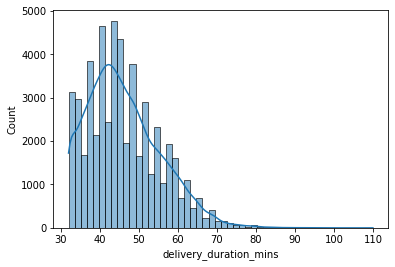

In [40]:
# Distribution of time_taken
sns.histplot(data=df_test,x='delivery_duration_mins',bins=50,kde=True)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

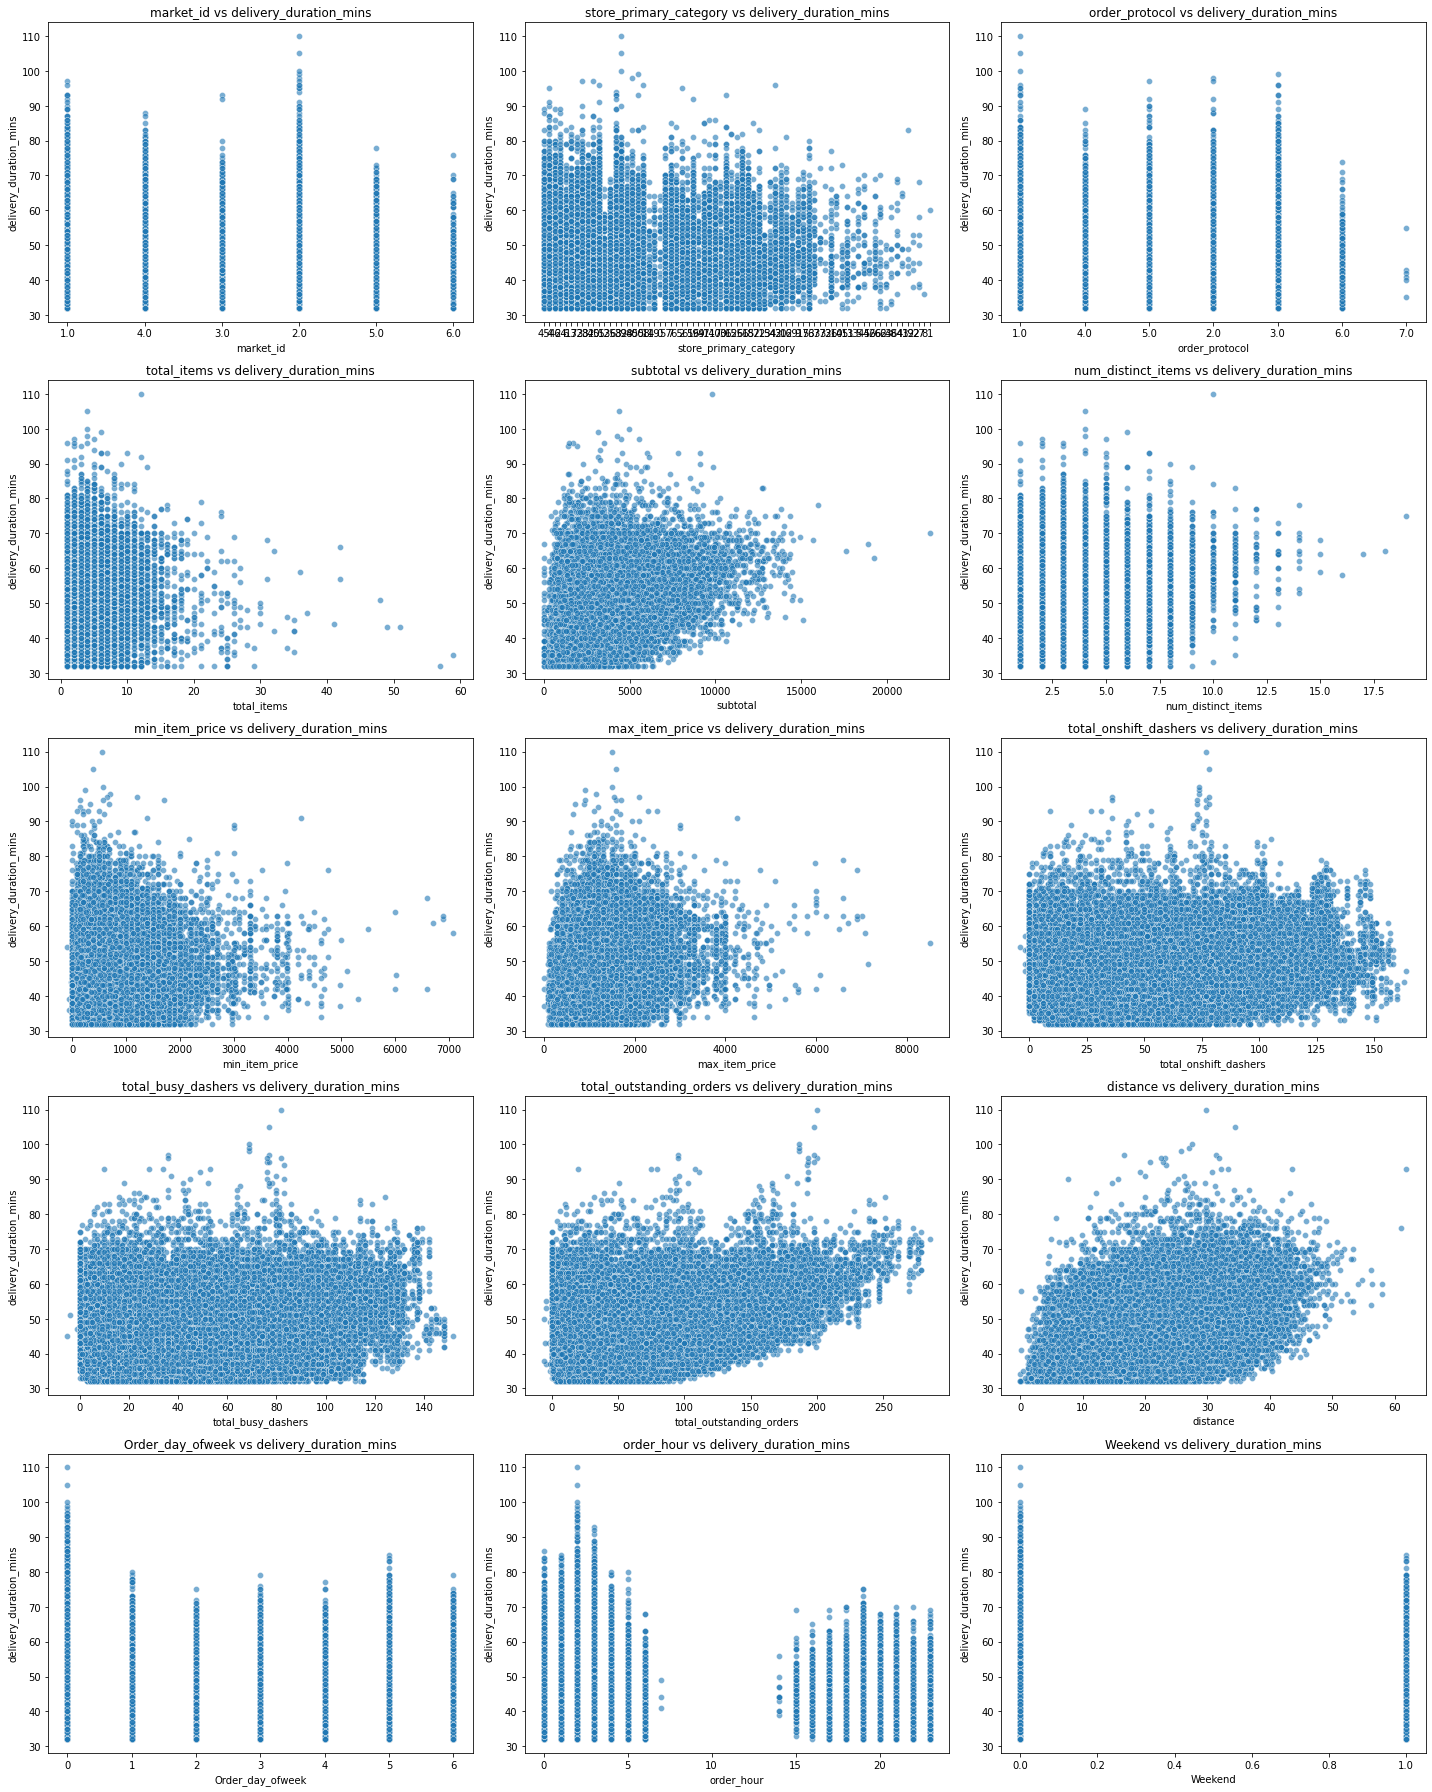

In [41]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 25))
for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(data=df_test, x=col, y=target_variable, alpha=0.6)
    plt.title(f'{col} vs {target_variable}')
    plt.tight_layout()

plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [42]:
# Drop the weakly correlated columns from training dataset
cor=round(df_train.corr(),2)
cor=cor.loc['delivery_duration_mins',:]
cor.sort_values(ascending=False)

delivery_duration_mins      1.00
distance                    0.50
subtotal                    0.34
total_outstanding_orders    0.28
num_distinct_items          0.25
total_items                 0.23
max_item_price              0.21
Weekend                     0.12
total_busy_dashers          0.09
total_onshift_dashers       0.06
order_hour                 -0.32
Name: delivery_duration_mins, dtype: float64

In [43]:
df_test.drop(['min_item_price','store_primary_category','market_id','order_protocol','Order_day_ofweek'],axis=1,inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [44]:
# Import libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [45]:
num_vars = [
    'total_items',
    'subtotal',
    'num_distinct_items',
    'max_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_outstanding_orders',
    'distance',
    'order_hour','delivery_duration_mins'
]
len(num_vars)


10

In [46]:
df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746             2      1790                   2             995   
173338            1       845                   1             795   
37592             1      1900                   1            1200   
42763             6       463                   3             299   
27506             3      3500                   3            1200   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                    10.0                 9.0                      15.0   
173338                  134.0                76.0                     136.0   
37592                    21.0                21.0                      28.0   
42763                    98.0                87.0                     129.0   
27506                     7.0                13.0                      17.0   

        distance  delivery_duration_mins  order_hour  Weekend  
94746      18.04                    41.0          18        0  
173338     24.28                    41.0           2        1  
37592      28.24                    44.0          23        1  
42763      13.88                    40.0           1        1  
27506       8.00                    44.0           5        1

In [47]:
# Apply scaling to the numerical columns
scaler=MinMaxScaler()

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746      0.166667  0.295039                 0.2        0.445190   
173338     0.000000  0.139278                 0.0        0.355705   
37592      0.000000  0.313170                 0.0        0.536913   
42763      0.833333  0.076314                 0.4        0.133781   
27506      0.333333  0.576891                 0.4        0.536913   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
94746                0.092857            0.097015                  0.113514   
173338               0.978571            0.597015                  0.767568   
37592                0.171429            0.186567                  0.183784   
42763                0.721429            0.679104                  0.729730   
27506                0.071429            0.126866                  0.124324   

        distance  delivery_duration_mins  order_hour  Weekend  
94746   0.382528                0.250000    0.782609        0  
173338  0.514843                0.250000    0.086957        1  
37592   0.598813                0.333333    1.000000        1  
42763   0.294317                0.222222    0.043478        1  
27506   0.169635                0.333333    0.217391        1

In [48]:
df_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  103240.000000  103240.000000       103240.000000   103240.000000   
mean        0.286184       0.375228            0.278731        0.478908   
std         0.242950       0.198347            0.244328        0.176020   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.166667       0.219054            0.000000        0.357494   
50%         0.166667       0.330806            0.200000        0.458613   
75%         0.500000       0.492830            0.400000        0.581655   
max         1.000000       1.000000            1.000000        1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          103240.000000       103240.000000             103240.000000   
mean                0.313508            0.314548                  0.307403   
std                 0.219150            0.214442                  0.236160   
min                 0.000000            0.000000                  0.000000   
25%                 0.135714            0.134328                  0.118919   
50%                 0.264286            0.268657                  0.232432   
75%                 0.450000            0.462687                  0.443243   
max                 1.000000            1.000000                  1.000000   

            distance  delivery_duration_mins     order_hour        Weekend  
count  103240.000000           103240.000000  103240.000000  103240.000000  
mean        0.458881                0.347855       0.394184       0.327083  
std         0.183491                0.222722       0.384134       0.469150  
min         0.000000                0.000000       0.000000       0.000000  
25%         0.321459                0.166667       0.086957       0.000000  
50%         0.458015                0.333333       0.173913       0.000000  
75%         0.592027                0.500000       0.826087       1.000000  
max         1.000000                1.000000       1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [49]:
# Create/Initialise the model
#using statsmodels and all the 10 features are gonna be used
y_train=df_train.pop('delivery_duration_mins')
X_train=df_train

In [50]:
# Train the model using the training data
X_train_sm=sm.add_constant(X_train)

X_train_model=sm.OLS(y_train,X_train_sm).fit()

print(X_train_model.params)
print(X_train_model.summary())

const                       0.049750
total_items                -0.014383
subtotal                    0.220733
num_distinct_items          0.078410
max_item_price              0.048454
total_onshift_dashers      -1.454790
total_busy_dashers         -0.526475
total_outstanding_orders    1.823367
distance                    0.614386
order_hour                 -0.152972
Weekend                     0.042454
dtype: float64
                              OLS Regression Results                              
Dep. Variable:     delivery_duration_mins   R-squared:                       0.847
Model:                                OLS   Adj. R-squared:                  0.847
Method:                     Least Squares   F-statistic:                 5.734e+04
Date:                    Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                            23:31:35   Log-Likelihood:             1.0561e+05
No. Observations:                  103240   AIC:                        -2.112e+

In [51]:
# Make predictions
y_train_pred=X_train_model.predict(X_train_sm)

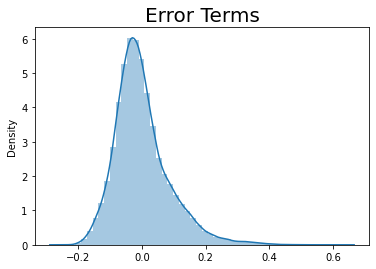

In [52]:
# Find results for evaluation metrics
residual=y_train-y_train_pred
sns.distplot(residual)
plt.title('Error Terms', fontsize = 20)                  
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [53]:
# Loop through the number of features and test the model
linearmodel=LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [54]:
# Build the final model with selected number of features
rfe=RFE(estimator=linearmodel,n_features_to_select=8)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', False, 3),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_onshift_dashers', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('order_hour', True, 1),
 ('Weekend', False, 2)]

In [56]:
supp_cols=X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['total_items', 'Weekend'], dtype='object')

In [58]:
#add const
X_train_lm=sm.add_constant(X_train[supp_cols])

X_train_lmodel=sm.OLS(y_train,X_train_lm).fit()

print(X_train_lmodel.params)

print(X_train_lmodel.summary())

const                       0.056256
subtotal                    0.218692
num_distinct_items          0.072224
max_item_price              0.055666
total_onshift_dashers      -1.471329
total_busy_dashers         -0.511037
total_outstanding_orders    1.826578
distance                    0.615588
order_hour                 -0.150205
dtype: float64
                              OLS Regression Results                              
Dep. Variable:     delivery_duration_mins   R-squared:                       0.840
Model:                                OLS   Adj. R-squared:                  0.839
Method:                     Least Squares   F-statistic:                 6.750e+04
Date:                    Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                            23:31:37   Log-Likelihood:             1.0300e+05
No. Observations:                  103240   AIC:                        -2.060e+05
Df Residuals:                      103231   BIC:                       

In [59]:
X=X_train[supp_cols]

In [60]:
y_train.shape

(103240,)

In [61]:
y_train=np.array(y_train)
y_train_lm=y_train.reshape(-1,1)
y_train_lm.shape

(103240, 1)

In [62]:
linear_model=LinearRegression()
linear_model.fit(X,y_train)

LinearRegression()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [63]:
df_test.head(2)

total_items  subtotal  num_distinct_items  max_item_price  \
139667            3      1295                   2             995   
80077             2      2950                   1            1225   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
139667                   59.0                59.0                      61.0   
80077                    18.0                17.0                      16.0   

        distance  delivery_duration_mins  order_hour  Weekend  
139667     20.56                    39.0           3        0  
80077      12.84                    42.0           1        1

In [64]:
#rescaling on test

df_test[num_vars]=scaler.transform(df_test[num_vars])

df_test.head()

total_items  subtotal  num_distinct_items  max_item_price  \
139667     0.333333  0.213450                 0.2        0.445190   
80077      0.166667  0.486237                 0.0        0.548098   
41872      0.000000  0.229932                 0.0        0.624161   
165269     0.166667  0.489039                 0.2        0.558837   
151215     0.333333  0.206033                 0.2        0.178971   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
139667               0.442857            0.470149                  0.362162   
80077                0.150000            0.156716                  0.118919   
41872                0.221429            0.231343                  0.275676   
165269               0.907143            0.977612                  1.113514   
151215               0.300000            0.253731                  0.210811   

        distance  delivery_duration_mins  order_hour  Weekend  
139667  0.435963                0.194444    0.130435        0  
80077   0.272265                0.277778    0.043478        1  
41872   0.356234                0.444444    0.130435        0  
165269  0.402884                0.638889    0.130435        1  
151215  0.566582                0.138889    0.956522        1

### dividing into x and y

In [65]:
y_test=df_test.pop('delivery_duration_mins')
X_test=df_test

In [66]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[supp_cols]

In [67]:
X_test_new.head(2)

subtotal  num_distinct_items  max_item_price  total_onshift_dashers  \
139667  0.213450                 0.2        0.445190               0.442857   
80077   0.486237                 0.0        0.548098               0.150000   

        total_busy_dashers  total_outstanding_orders  distance  order_hour  
139667            0.470149                  0.362162  0.435963    0.130435  
80077             0.156716                  0.118919  0.272265    0.043478

In [68]:
linear_model

LinearRegression()

In [69]:
y_test_pred = linear_model.predict(X_test_new)

In [70]:
res_test=y_test-y_test_pred

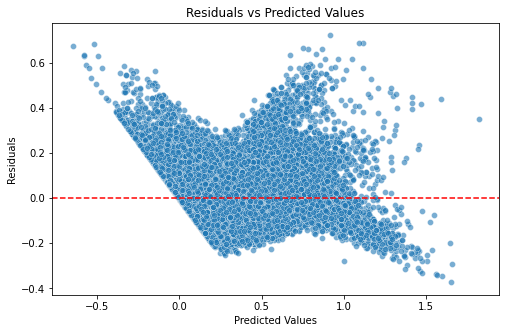

In [71]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# 1. Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=res_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

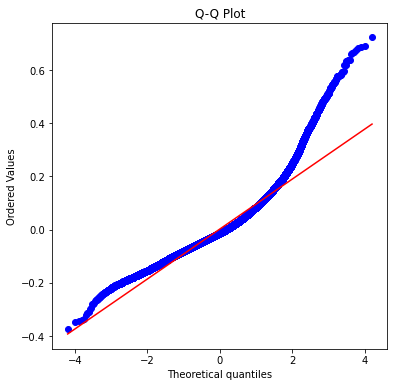

In [72]:
# 2. Q-Q Plot (to check normality)
plt.figure(figsize=(6, 6))
stats.probplot(res_test, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

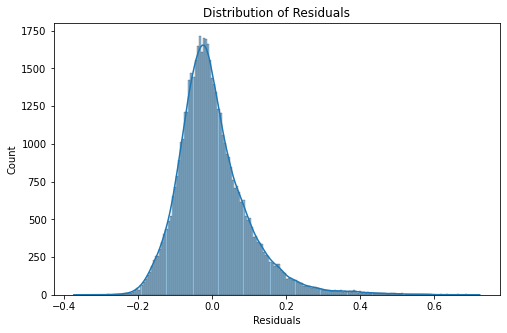

In [73]:
# 3. Histogram of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(res_test, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

[Your inferences here:]
after selecting 8 variables using rfe we got adjusted r2 =0.840
but even if 10 variables model was predicting good 
residual analysis is also done and the model is run on testset also

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [74]:
# Compare the scaled vs unscaled features used in the final model
# Unscaled version
X_unscaled = porter[num_vars]

# Scaled version
X_scaled=df_train

In [75]:
comparison = pd.DataFrame({
    'Unscaled Mean': X_unscaled.mean(),
    'Unscaled Std': X_unscaled.std(),
    'Scaled Mean': X_scaled.mean(),
    'Scaled Std': X_scaled.std()
})

print(comparison)


                          Unscaled Mean  Unscaled Std  Scaled Mean  Scaled Std
Weekend                             NaN           NaN     0.327083    0.469150
delivery_duration_mins        46.203013      9.327424          NaN         NaN
distance                      21.843090      8.748712     0.458881    0.183491
max_item_price              1160.158616    560.828571     0.478908    0.176020
num_distinct_items             2.675060      1.625681     0.278731    0.244328
order_hour                     8.473441      8.676809     0.394184    0.384134
subtotal                    2697.111147   1828.554893     0.375228    0.198347
total_busy_dashers            41.861381     32.168505     0.314548    0.214442
total_items                    3.204976      2.674055     0.286184    0.242950
total_onshift_dashers         44.918664     34.544724     0.313508    0.219150
total_outstanding_orders      58.230115     52.731043     0.307403    0.236160


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [76]:
# Analyze the effect of a unit change in a feature, say 'total_items'


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

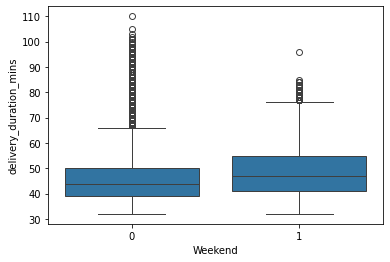

In [77]:
sns.boxplot(x=porter['Weekend'],y=porter['delivery_duration_mins'])
plt.show()

**Answer:**
>Yes there are categorical variabels which affect the delivery time duration ,for ex: Weekend is categorical variable this varaible clearly affects the target varaible as seen above 1 is weekend where the median time to deliver is also high

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test size 0.2 means 20 % of the dataset is considered as test set

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Distance

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>i used boxplot to find outliers visually once i found them i used iqr i.e inter quartile range 
lower bound=q1-1.5*iqr
upper bound=q3+1.5*iqr
Observations outside this range were considered outliers

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Distance,total_outstanding_orders,total_onshift_dashers    

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>1.Assumes a linear relationship between independent variables and the target variable.
2.Finds the best-fit line by minimizing the sum of squared errors (using OLS).
3.Coefficients show impact of each feature on the target, making it easy to interpret.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>SLR (Simple Linear Regression): Involves one independent variable to predict the target.
MLR (Multiple Linear Regression): Uses two or more independent variables to predict the target.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures the error between predicted and actual values (usually using Mean Squared Error).
It helps assess how well the model fits the data.
The cost function is minimized using optimization techniques like Ordinary Least Squares (OLS) to find the best model parameters.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Underfitting occurs when the model is too simple to capture the underlying pattern in the data.
Overfitting happens when the model is too complex and captures noise along with the pattern.
Underfitting leads to poor performance on both training and test data, while overfitting performs well on training but poorly on test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots show the difference between actual and predicted values (residuals).
They help check if the errors are randomly distributed, indicating a good linear fit.
Patterns or trends in the residuals suggest problems like non-linearity, heteroscedasticity, or missing variables.